## Import packages

In [1]:
import pandas as pd
import plotly
from chart_studio import plotly
from plotnine import *
# import MySQLdb
import fecfile
import requests
import time
# import sqlalchemy
#import pickle
import datetime
import numpy as np

## Data dictionary

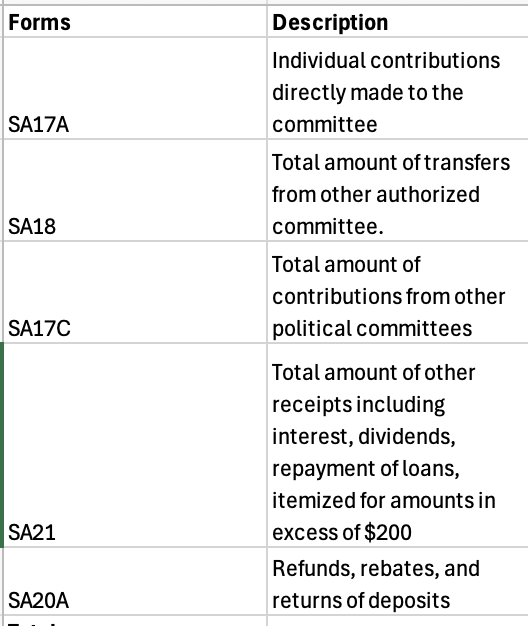

## Get file number for F3PN for each campaign

F3PN is for contributions and expenses.

- Kamala Harris for President - 1805248
- Donald J. Trump for President 2024, Inc. - 1805185

In [2]:
filing = fecfile.from_http('1805248') #file no for Kamala
# filing

## Schedule A: Contributions

Schedule B is for expenses

In [3]:
df = pd.DataFrame(filing['itemizations']['Schedule A'])
df.contribution_date=pd.to_datetime(df.contribution_date)
df.contribution_amount=pd.to_numeric(df.contribution_amount)
df[df.memo_code=='X'].to_clipboard(index=False)
# pd.set_option('display.max_columns', None)
df

,form_type,filer_committee_id_number,transaction_id,back_reference_tran_id_number,back_reference_sched_name,entity_type,contributor_organization_name,contributor_last_name,contributor_first_name,contributor_middle_name,...,donor_candidate_district,conduit_name,conduit_street1,conduit_street2,conduit_city,conduit_state,conduit_zip_code,memo_code,memo_text_description,reference_code
0,SA17A,C00703975,6883091,6883091E,SA17A,IND,,Attia,Patricia,,...,,,,,,,,X,* Earmarked Contribution: See Below,
1,SA17A,C00703975,6883091E,,,PAC,ActBlue,,,,...,,,,,,,,X,* Above Contribution earmarked through this or...,
2,SA17A,C00703975,9059829,,,IND,,Attia,Patricia,,...,,,,,,,,X,,
3,SA17A,C00703975,9059952,9059829,SA17A,IND,,Attia,Patricia,,...,,,,,,,,X,,
4,SA17A,C00703975,7716543,7716543E,SA17A,IND,,Attia,Patricia,,...,,,,,,,,X,* Earmarked Contribution: See Below,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404378,SA20A,C00703975,10175800,,,ORG,Gusto,,,,...,,,,,,,,,Payroll Tax Refund,
404379,SA20A,C00703975,10175801,,,ORG,Gusto,,,,...,,,,,,,,,Payroll Tax Refund,
404380,SA20A,C00703975,10175802,,,ORG,Gusto,,,,...,,,,,,,,,Payroll Tax Refund,
404381,SA20A,C00703975,10175759,,,COM,Biden Victory Fund,,,,...,,,,,,,,,Text Message Outreach,


In [4]:
df.form_type.value_counts()

SA17A    258362
SA18     146009
SA17C         7
SA20A         4
SA21          1
Name: form_type, dtype: int64

## SA17A: direct contributions

In [5]:
sa17a= df[df.form_type=='SA17A']
sa17a

,form_type,filer_committee_id_number,transaction_id,back_reference_tran_id_number,back_reference_sched_name,entity_type,contributor_organization_name,contributor_last_name,contributor_first_name,contributor_middle_name,...,donor_candidate_district,conduit_name,conduit_street1,conduit_street2,conduit_city,conduit_state,conduit_zip_code,memo_code,memo_text_description,reference_code
0,SA17A,C00703975,6883091,6883091E,SA17A,IND,,Attia,Patricia,,...,,,,,,,,X,* Earmarked Contribution: See Below,
1,SA17A,C00703975,6883091E,,,PAC,ActBlue,,,,...,,,,,,,,X,* Above Contribution earmarked through this or...,
2,SA17A,C00703975,9059829,,,IND,,Attia,Patricia,,...,,,,,,,,X,,
3,SA17A,C00703975,9059952,9059829,SA17A,IND,,Attia,Patricia,,...,,,,,,,,X,,
4,SA17A,C00703975,7716543,7716543E,SA17A,IND,,Attia,Patricia,,...,,,,,,,,X,* Earmarked Contribution: See Below,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258357,SA17A,C00703975,9056824E,,,PAC,ActBlue,,,,...,,,,,,,,X,Note: Above Contribution earmarked through thi...,
258358,SA17A,C00703975,9495777,9495777E,SA17A,IND,,Zyscovich,Bernard,,...,,,,,,,,,* Earmarked Contribution: See Below,
258359,SA17A,C00703975,9495777E,,,PAC,ActBlue,,,,...,,,,,,,,X,Note: Above Contribution earmarked through thi...,
258360,SA17A,C00703975,9487334,9487334E,SA17A,IND,,Zyskowski,Lori,,...,,,,,,,,,* Earmarked Contribution: See Below,


### SA17A: removing the memo code

In [6]:
sa17a_memo = sa17a[sa17a.memo_code!='X']
sa17a_memo

,form_type,filer_committee_id_number,transaction_id,back_reference_tran_id_number,back_reference_sched_name,entity_type,contributor_organization_name,contributor_last_name,contributor_first_name,contributor_middle_name,...,donor_candidate_district,conduit_name,conduit_street1,conduit_street2,conduit_city,conduit_state,conduit_zip_code,memo_code,memo_text_description,reference_code
12,SA17A,C00703975,7918863,7918863E,SA17A,IND,,A Gittleman,Dean,,...,,,,,,,,,* Earmarked Contribution: See Below,
14,SA17A,C00703975,7926078,7926078E,SA17A,IND,,A Jones,Linda,,...,,,,,,,,,* Earmarked Contribution: See Below,
16,SA17A,C00703975,7947614,7947614E,SA17A,IND,,A Lovette,Patricia,,...,,,,,,,,,* Earmarked Contribution: See Below,
18,SA17A,C00703975,7941720,7941720E,SA17A,IND,,A Magnuson,Martha,,...,,,,,,,,,* Earmarked Contribution: See Below,
20,SA17A,C00703975,7905336,7905336E,SA17A,IND,,A****N,ROBERT,,...,,,,,,,,,* Earmarked Contribution: See Below,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258352,SA17A,C00703975,9474521,9474521E,SA17A,IND,,Zylman,Carole,,...,,,,,,,,,* Earmarked Contribution: See Below,
258354,SA17A,C00703975,9297716,9297716E,SA17A,IND,,Zylstra,Carol,,...,,,,,,,,,* Earmarked Contribution: See Below,
258356,SA17A,C00703975,9056824,9056824E,SA17A,IND,,Zylstra,Janet,,...,,,,,,,,,* Earmarked Contribution: See Below,
258358,SA17A,C00703975,9495777,9495777E,SA17A,IND,,Zyscovich,Bernard,,...,,,,,,,,,* Earmarked Contribution: See Below,


In [7]:
sa17a_memo.contribution_amount.sum()

17010754.76

## Check: Just the memo codes

In [8]:
memo_x= sa17a[sa17a.memo_code=='X']
memo_x

,form_type,filer_committee_id_number,transaction_id,back_reference_tran_id_number,back_reference_sched_name,entity_type,contributor_organization_name,contributor_last_name,contributor_first_name,contributor_middle_name,...,donor_candidate_district,conduit_name,conduit_street1,conduit_street2,conduit_city,conduit_state,conduit_zip_code,memo_code,memo_text_description,reference_code
0,SA17A,C00703975,6883091,6883091E,SA17A,IND,,Attia,Patricia,,...,,,,,,,,X,* Earmarked Contribution: See Below,
1,SA17A,C00703975,6883091E,,,PAC,ActBlue,,,,...,,,,,,,,X,* Above Contribution earmarked through this or...,
2,SA17A,C00703975,9059829,,,IND,,Attia,Patricia,,...,,,,,,,,X,,
3,SA17A,C00703975,9059952,9059829,SA17A,IND,,Attia,Patricia,,...,,,,,,,,X,,
4,SA17A,C00703975,7716543,7716543E,SA17A,IND,,Attia,Patricia,,...,,,,,,,,X,* Earmarked Contribution: See Below,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
258353,SA17A,C00703975,9474521E,,,PAC,ActBlue,,,,...,,,,,,,,X,Note: Above Contribution earmarked through thi...,
258355,SA17A,C00703975,9297716E,,,PAC,ActBlue,,,,...,,,,,,,,X,Note: Above Contribution earmarked through thi...,
258357,SA17A,C00703975,9056824E,,,PAC,ActBlue,,,,...,,,,,,,,X,Note: Above Contribution earmarked through thi...,
258359,SA17A,C00703975,9495777E,,,PAC,ActBlue,,,,...,,,,,,,,X,Note: Above Contribution earmarked through thi...,


In [9]:
memo_x.contribution_amount.sum()

16951418.43

## Filter all individual contributions in SA17A

In [10]:
sa17a_IND = sa17a[sa17a.entity_type=='IND'].reset_index(drop=True)
sa17a_IND

,form_type,filer_committee_id_number,transaction_id,back_reference_tran_id_number,back_reference_sched_name,entity_type,contributor_organization_name,contributor_last_name,contributor_first_name,contributor_middle_name,...,donor_candidate_district,conduit_name,conduit_street1,conduit_street2,conduit_city,conduit_state,conduit_zip_code,memo_code,memo_text_description,reference_code
0,SA17A,C00703975,6883091,6883091E,SA17A,IND,,Attia,Patricia,,...,,,,,,,,X,* Earmarked Contribution: See Below,
1,SA17A,C00703975,9059829,,,IND,,Attia,Patricia,,...,,,,,,,,X,,
2,SA17A,C00703975,9059952,9059829,SA17A,IND,,Attia,Patricia,,...,,,,,,,,X,,
3,SA17A,C00703975,7716543,7716543E,SA17A,IND,,Attia,Patricia,,...,,,,,,,,X,* Earmarked Contribution: See Below,
4,SA17A,C00703975,9059619,,,IND,,Attia,Patricia,,...,,,,,,,,X,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129729,SA17A,C00703975,9474521,9474521E,SA17A,IND,,Zylman,Carole,,...,,,,,,,,,* Earmarked Contribution: See Below,
129730,SA17A,C00703975,9297716,9297716E,SA17A,IND,,Zylstra,Carol,,...,,,,,,,,,* Earmarked Contribution: See Below,
129731,SA17A,C00703975,9056824,9056824E,SA17A,IND,,Zylstra,Janet,,...,,,,,,,,,* Earmarked Contribution: See Below,
129732,SA17A,C00703975,9495777,9495777E,SA17A,IND,,Zyscovich,Bernard,,...,,,,,,,,,* Earmarked Contribution: See Below,


In [11]:
sa17a_IND.contribution_amount.sum()

17011974.759999998

In [12]:
def categorize_amount(amount):
    if 1 <= amount <= 24:
        return '1-24'
    if 25 <= amount <= 49:
        return '25-49'
    elif 50 <= amount <= 74:
        return '50-74'
    elif 75 <= amount <= 99:
        return '75-99'
    elif 100 <= amount <= 149:
        return '100-149'
    elif 150 <= amount <= 199:
        return '150-199'
    elif amount >= 200:
        return '200 and over'
    else:
        return 'Below 1'

In [13]:
sa17a_IND['range'] = sa17a_IND['contribution_amount'].apply(categorize_amount)
sa17a_IND

,form_type,filer_committee_id_number,transaction_id,back_reference_tran_id_number,back_reference_sched_name,entity_type,contributor_organization_name,contributor_last_name,contributor_first_name,contributor_middle_name,...,conduit_name,conduit_street1,conduit_street2,conduit_city,conduit_state,conduit_zip_code,memo_code,memo_text_description,reference_code,range
0,SA17A,C00703975,6883091,6883091E,SA17A,IND,,Attia,Patricia,,...,,,,,,,X,* Earmarked Contribution: See Below,,200 and over
1,SA17A,C00703975,9059829,,,IND,,Attia,Patricia,,...,,,,,,,X,,,Below 1
2,SA17A,C00703975,9059952,9059829,SA17A,IND,,Attia,Patricia,,...,,,,,,,X,,,200 and over
3,SA17A,C00703975,7716543,7716543E,SA17A,IND,,Attia,Patricia,,...,,,,,,,X,* Earmarked Contribution: See Below,,200 and over
4,SA17A,C00703975,9059619,,,IND,,Attia,Patricia,,...,,,,,,,X,,,Below 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129729,SA17A,C00703975,9474521,9474521E,SA17A,IND,,Zylman,Carole,,...,,,,,,,,* Earmarked Contribution: See Below,,1-24
129730,SA17A,C00703975,9297716,9297716E,SA17A,IND,,Zylstra,Carol,,...,,,,,,,,* Earmarked Contribution: See Below,,50-74
129731,SA17A,C00703975,9056824,9056824E,SA17A,IND,,Zylstra,Janet,,...,,,,,,,,* Earmarked Contribution: See Below,,50-74
129732,SA17A,C00703975,9495777,9495777E,SA17A,IND,,Zyscovich,Bernard,,...,,,,,,,,* Earmarked Contribution: See Below,,200 and over


In [14]:
categories= sa17a_IND.groupby('range').contribution_amount.sum()
categories

range
1-24              258664.48
100-149          2877707.14
150-199           247436.90
200 and over    12310548.31
25-49             995299.66
50-74             805743.02
75-99             109509.68
Below 1          -592934.43
Name: contribution_amount, dtype: float64

In [15]:
categories_by_date = sa17a_IND.groupby('range').resample('D', on='contribution_date').contribution_amount.sum().to_frame()
categories_by_date

contribution_amount
range   contribution_date                             
1-24    2024-06-01 00:00:00-04:00             12419.54
        2024-06-02 00:00:00-04:00              6434.98
        2024-06-03 00:00:00-04:00              5017.01
        2024-06-04 00:00:00-04:00              4898.78
        2024-06-05 00:00:00-04:00              4871.78
...                                                ...
Below 1 2024-06-26 00:00:00-04:00                 0.00
        2024-06-27 00:00:00-04:00             -1160.00
        2024-06-28 00:00:00-04:00                 0.00
        2024-06-29 00:00:00-04:00                 0.00
        2024-06-30 00:00:00-04:00           -258597.09

[277 rows x 1 columns]

In [16]:
categories_by_date.to_csv('dated contributions in buckets.csv')

In [18]:
sa17a_IND_200_wide = sa17a_IND.pivot_table(columns= "transaction_id", index="contribution_date", values='contribution_amount', aggfunc='sum', fill_value='0', dropna=False).reset_index()
sa17a_IND_200_wide.head(10)

transaction_id,contribution_date,10042936,10042937,6883091,7681653,7716543,7896296,7896376,7896380,7896386,...,9875710,9875712,9875715,9875716,9875717,9875720,9875721,9875723,9875725,9875727
0,2024-04-30 00:00:00-04:00,0,0,360.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2024-05-27 00:00:00-04:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2024-05-28 00:00:00-04:00,0,0,0,500.0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2024-05-30 00:00:00-04:00,0,0,0,0,360.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2024-05-31 00:00:00-04:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,2024-06-01 00:00:00-04:00,0,0,0,0,0,500.0,100.0,500.0,200.0,...,0,0,0,0,0,0,0,0,0,0
6,2024-06-02 00:00:00-04:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,2024-06-03 00:00:00-04:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,2024-06-04 00:00:00-04:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,2024-06-05 00:00:00-04:00,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [19]:
sa17a_IND_200_long = pd.melt(sa17a_IND_200_wide, id_vars=['contribution_date'], value_name='contribution_amount', \
                   var_name='transaction_id')
sa17a_IND_200_long

,contribution_date,transaction_id,contribution_amount
0,2024-04-30 00:00:00-04:00,10042936,0
1,2024-05-27 00:00:00-04:00,10042936,0
2,2024-05-28 00:00:00-04:00,10042936,0
3,2024-05-30 00:00:00-04:00,10042936,0
4,2024-05-31 00:00:00-04:00,10042936,0
...,...,...,...
4540685,2024-06-26 00:00:00-04:00,9875727,20.0
4540686,2024-06-27 00:00:00-04:00,9875727,0
4540687,2024-06-28 00:00:00-04:00,9875727,0
4540688,2024-06-29 00:00:00-04:00,9875727,0


In [20]:
sa17a_IND_200_long.contribution_amount = sa17a_IND_200_long.contribution_amount.astype(float)

In [21]:
sa17a_IND_200_long = sa17a_IND_200_long[sa17a_IND_200_long.contribution_amount>=1]
sa17a_IND_200_long

,contribution_date,transaction_id,contribution_amount
69,2024-06-30 00:00:00-04:00,10042937,3300.0
70,2024-04-30 00:00:00-04:00,6883091,360.0
107,2024-05-28 00:00:00-04:00,7681653,500.0
143,2024-05-30 00:00:00-04:00,7716543,360.0
180,2024-06-01 00:00:00-04:00,7896296,500.0
...,...,...,...
4540549,2024-06-30 00:00:00-04:00,9875720,1000.0
4540578,2024-06-24 00:00:00-04:00,9875721,20.0
4540614,2024-06-25 00:00:00-04:00,9875723,8.0
4540651,2024-06-27 00:00:00-04:00,9875725,40.0


In [ ]:
# (
#     ggplot(sa17a_IND_200_long, aes('contribution_date','contribution_amount')) +
#            geom_point(color="blue") +
#            theme(figure_size=(14,8)) +
#            theme(subplots_adjust={'wspace': 0.25}, axis_text_x=element_text(rotation=90)) +
#            labs(x= "Date", y="Contributions", title="Individual contributions")
# )

## Simple chart of SA17A

In [ ]:
sa17a_IND_chart = sa17a_IND.resample('D', on='contribution_date').contribution_amount.sum().to_frame().reset_index()
sa17a_IND_chart

In [ ]:
sa17a_IND_chart = sa17a_IND_chart.sort_values('contribution_date')
sa17a_IND_chart = sa17a_IND_chart[sa17a_IND_chart.contribution_date>='2024-06-01'].reset_index(drop=True) #only June
sa17a_IND_chart

In [ ]:
# sa17a_IND_chart.to_csv('direct_cumulative.csv', index=False)

In [ ]:
sa17a_IND_chart.plot(x='contribution_date', y='contribution_amount', kind='bar', figsize=(10,6), title='Individual direct contributions to Biden campaign')

## SA18: transfers from authorized committee

In [22]:
sa18= df[df.form_type=='SA18']
sa18

,form_type,filer_committee_id_number,transaction_id,back_reference_tran_id_number,back_reference_sched_name,entity_type,contributor_organization_name,contributor_last_name,contributor_first_name,contributor_middle_name,...,donor_candidate_district,conduit_name,conduit_street1,conduit_street2,conduit_city,conduit_state,conduit_zip_code,memo_code,memo_text_description,reference_code
258369,SA18,C00703975,8938506,,,COM,Biden Victory Fund,,,,...,,,,,,,,,,
258370,SA18,C00703975,10883027,8938506,SA18,IND,,A Bair,Julene,,...,,,,,,,,X,* Biden Victory Fund,
258371,SA18,C00703975,10337166,8938506,SA18,IND,,A Braboy,Andrea,,...,,,,,,,,X,* Biden Victory Fund,
258372,SA18,C00703975,10548847,8938506,SA18,IND,,A Cain,David,,...,,,,,,,,X,* Biden Victory Fund,
258373,SA18,C00703975,10865459,8938506,SA18,IND,,A Caldwell,Deborah,,...,,,,,,,,X,* Biden Victory Fund,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404373,SA18,C00703975,10847712,8938506,SA18,IND,,ZYNSKY,JOHN,,...,,,,,,,,X,* Biden Victory Fund,
404374,SA18,C00703975,10777600,8938506,SA18,IND,,Zyrkowski,Mary,,...,,,,,,,,X,* Biden Victory Fund,
404375,SA18,C00703975,10705536,8938506,SA18,IND,,Zysk,Dennis,,...,,,,,,,,X,* Biden Victory Fund,
404376,SA18,C00703975,10649269,8938506,SA18,IND,,Zyskoski,Alma,E.,...,,,,,,,,X,* Biden Victory Fund,


In [23]:
sa18= sa18.reset_index(drop=True)
sa18

,form_type,filer_committee_id_number,transaction_id,back_reference_tran_id_number,back_reference_sched_name,entity_type,contributor_organization_name,contributor_last_name,contributor_first_name,contributor_middle_name,...,donor_candidate_district,conduit_name,conduit_street1,conduit_street2,conduit_city,conduit_state,conduit_zip_code,memo_code,memo_text_description,reference_code
0,SA18,C00703975,8938506,,,COM,Biden Victory Fund,,,,...,,,,,,,,,,
1,SA18,C00703975,10883027,8938506,SA18,IND,,A Bair,Julene,,...,,,,,,,,X,* Biden Victory Fund,
2,SA18,C00703975,10337166,8938506,SA18,IND,,A Braboy,Andrea,,...,,,,,,,,X,* Biden Victory Fund,
3,SA18,C00703975,10548847,8938506,SA18,IND,,A Cain,David,,...,,,,,,,,X,* Biden Victory Fund,
4,SA18,C00703975,10865459,8938506,SA18,IND,,A Caldwell,Deborah,,...,,,,,,,,X,* Biden Victory Fund,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146004,SA18,C00703975,10847712,8938506,SA18,IND,,ZYNSKY,JOHN,,...,,,,,,,,X,* Biden Victory Fund,
146005,SA18,C00703975,10777600,8938506,SA18,IND,,Zyrkowski,Mary,,...,,,,,,,,X,* Biden Victory Fund,
146006,SA18,C00703975,10705536,8938506,SA18,IND,,Zysk,Dennis,,...,,,,,,,,X,* Biden Victory Fund,
146007,SA18,C00703975,10649269,8938506,SA18,IND,,Zyskoski,Alma,E.,...,,,,,,,,X,* Biden Victory Fund,


In [24]:
sa18= sa18.drop([0,146008])
sa18
#dropped total at the top and unitemized contributions at the bottom
#may differ in succeeding reports.

,form_type,filer_committee_id_number,transaction_id,back_reference_tran_id_number,back_reference_sched_name,entity_type,contributor_organization_name,contributor_last_name,contributor_first_name,contributor_middle_name,...,donor_candidate_district,conduit_name,conduit_street1,conduit_street2,conduit_city,conduit_state,conduit_zip_code,memo_code,memo_text_description,reference_code
1,SA18,C00703975,10883027,8938506,SA18,IND,,A Bair,Julene,,...,,,,,,,,X,* Biden Victory Fund,
2,SA18,C00703975,10337166,8938506,SA18,IND,,A Braboy,Andrea,,...,,,,,,,,X,* Biden Victory Fund,
3,SA18,C00703975,10548847,8938506,SA18,IND,,A Cain,David,,...,,,,,,,,X,* Biden Victory Fund,
4,SA18,C00703975,10865459,8938506,SA18,IND,,A Caldwell,Deborah,,...,,,,,,,,X,* Biden Victory Fund,
5,SA18,C00703975,10646881,8938506,SA18,IND,,A Cawood,Christi,,...,,,,,,,,X,* Biden Victory Fund,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146003,SA18,C00703975,10370659,8938506,SA18,IND,,Zylinsky,David,,...,,,,,,,,X,* Biden Victory Fund,
146004,SA18,C00703975,10847712,8938506,SA18,IND,,ZYNSKY,JOHN,,...,,,,,,,,X,* Biden Victory Fund,
146005,SA18,C00703975,10777600,8938506,SA18,IND,,Zyrkowski,Mary,,...,,,,,,,,X,* Biden Victory Fund,
146006,SA18,C00703975,10705536,8938506,SA18,IND,,Zysk,Dennis,,...,,,,,,,,X,* Biden Victory Fund,


In [25]:
sa18.contribution_amount.sum()

24421760.78

In [26]:
sa18['range'] = sa18['contribution_amount'].apply(categorize_amount)
sa18

,form_type,filer_committee_id_number,transaction_id,back_reference_tran_id_number,back_reference_sched_name,entity_type,contributor_organization_name,contributor_last_name,contributor_first_name,contributor_middle_name,...,conduit_name,conduit_street1,conduit_street2,conduit_city,conduit_state,conduit_zip_code,memo_code,memo_text_description,reference_code,range
1,SA18,C00703975,10883027,8938506,SA18,IND,,A Bair,Julene,,...,,,,,,,X,* Biden Victory Fund,,50-74
2,SA18,C00703975,10337166,8938506,SA18,IND,,A Braboy,Andrea,,...,,,,,,,X,* Biden Victory Fund,,25-49
3,SA18,C00703975,10548847,8938506,SA18,IND,,A Cain,David,,...,,,,,,,X,* Biden Victory Fund,,200 and over
4,SA18,C00703975,10865459,8938506,SA18,IND,,A Caldwell,Deborah,,...,,,,,,,X,* Biden Victory Fund,,200 and over
5,SA18,C00703975,10646881,8938506,SA18,IND,,A Cawood,Christi,,...,,,,,,,X,* Biden Victory Fund,,200 and over
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146003,SA18,C00703975,10370659,8938506,SA18,IND,,Zylinsky,David,,...,,,,,,,X,* Biden Victory Fund,,25-49
146004,SA18,C00703975,10847712,8938506,SA18,IND,,ZYNSKY,JOHN,,...,,,,,,,X,* Biden Victory Fund,,50-74
146005,SA18,C00703975,10777600,8938506,SA18,IND,,Zyrkowski,Mary,,...,,,,,,,X,* Biden Victory Fund,,50-74
146006,SA18,C00703975,10705536,8938506,SA18,IND,,Zysk,Dennis,,...,,,,,,,X,* Biden Victory Fund,,100-149


In [27]:
categories_sa18= sa18.groupby('range').contribution_amount.sum()
categories_sa18

range
1-24              293781.42
100-149          2893707.55
150-199           287226.37
200 and over    18688050.11
25-49            1375876.30
50-74             771717.79
75-99             119265.04
Below 1            -7863.80
Name: contribution_amount, dtype: float64

## Simple chart for SA 18

In [31]:
sa18_chart = sa18.resample('D', on='contribution_date').contribution_amount.sum().to_frame().reset_index()
sa18_chart = sa18_chart.sort_values('contribution_date')
sa18_chart = sa18_chart[sa18_chart.contribution_date>='2024-06-01'].reset_index(drop=True) #only June
sa18_chart

,contribution_date,contribution_amount
0,2024-06-01 00:00:00-04:00,184729.07
1,2024-06-02 00:00:00-04:00,1063175.60
2,2024-06-03 00:00:00-04:00,289768.51
3,2024-06-04 00:00:00-04:00,263177.28
4,2024-06-05 00:00:00-04:00,608912.40
5,2024-06-06 00:00:00-04:00,382193.59
6,2024-06-07 00:00:00-04:00,535651.21
7,2024-06-08 00:00:00-04:00,132624.99
8,2024-06-09 00:00:00-04:00,3691421.84
9,2024-06-10 00:00:00-04:00,874964.62


<AxesSubplot:title={'center':'Contributions via transfers to Biden campaign'}, xlabel='contribution_date'>

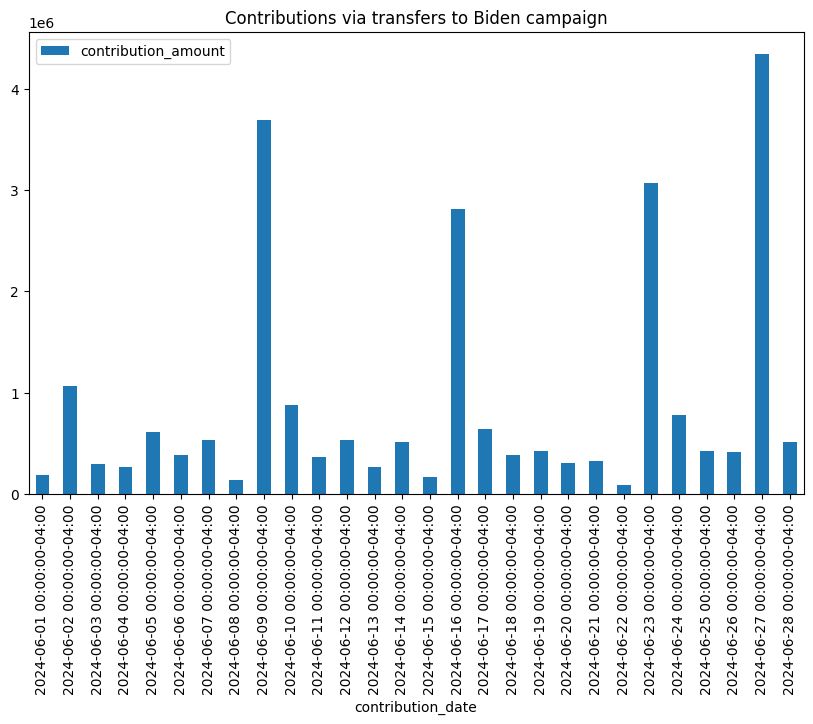

In [32]:
sa18_chart.plot(x='contribution_date', y='contribution_amount', kind='bar', figsize=(10,6), title= 'Contributions via transfers to Biden campaign')

## SA17C

In [50]:
sa17c= df[df.form_type=='SA17C']
sa17c= sa17c.reset_index(drop=False)
pd.set_option('display.max_columns', 50)
sa17c

,index,form_type,filer_committee_id_number,transaction_id,back_reference_tran_id_number,back_reference_sched_name,entity_type,contributor_organization_name,contributor_last_name,contributor_first_name,contributor_middle_name,contributor_prefix,contributor_suffix,contributor_street_1,contributor_street_2,contributor_city,contributor_state,contributor_zip_code,election_code,election_other_description,contribution_date,contribution_amount,contribution_aggregate,contribution_purpose_descrip,contributor_employer,contributor_occupation,donor_committee_fec_id,donor_committee_name,donor_candidate_fec_id,donor_candidate_last_name,donor_candidate_first_name,donor_candidate_middle_name,donor_candidate_prefix,donor_candidate_suffix,donor_candidate_office,donor_candidate_state,donor_candidate_district,conduit_name,conduit_street1,conduit_street2,conduit_city,conduit_state,conduit_zip_code,memo_code,memo_text_description,reference_code
0,258362,SA17C,C00703975,9668926,,,PAC,Social Security Works PAC,,,,,,PO Box 27380,,Washington,DC,200387380,P2024,,2024-06-12 00:00:00-04:00,300.00,300.00,,,,C00637504,Social Security Works PAC,,,,,,,,,,,,,,,,,* In-Kind: Fundraising Blast Email,
1,258363,SA17C,C00703975,9617988,,,PAC,"Planned Parenthood Action Fund Inc., PAC",,,,,,123 William St,,New York,NY,100383804,P2024,,2024-06-17 00:00:00-04:00,651.25,1575.28,,,,C00314617,"Planned Parenthood Action Fund Inc., PAC",,,,,,,,,,,,,,,,,* In-Kind: Staff Time & Travel,
2,258364,SA17C,C00703975,10169464,,,PAC,"Planned Parenthood Action Fund Inc., PAC",,,,,,123 William St,,New York,NY,100383804,P2024,,2024-06-24 00:00:00-04:00,239.42,1960.30,,,,C00314617,"Planned Parenthood Action Fund Inc., PAC",,,,,,,,,,,,,,,,,* In-Kind: Staff Time & Travel,
3,258365,SA17C,C00703975,9617944,,,PAC,"Planned Parenthood Action Fund Inc., PAC",,,,,,123 William St,,New York,NY,100383804,P2024,,2024-06-24 00:00:00-04:00,145.60,1960.30,,,,C00314617,"Planned Parenthood Action Fund Inc., PAC",,,,,,,,,,,,,,,,,* In-Kind: Staff Time & Travel,
4,258366,SA17C,C00703975,10174718,,,PAC,Occupy Democrats Election Fund,,,,,,2021 L St NW,Ste 101,Washington,DC,200364914,P2024,,2024-06-29 00:00:00-04:00,5000.00,5000.00,,,,C00718510,Occupy Democrats Election Fund,,,,,,,,,,,,,,,,,,
5,258367,SA17C,C00703975,9608807,,,PAC,National Air Traffic Controllers Association PAC,,,,,,1325 Massachusetts Ave NW,,Washington,DC,200054171,P2024,,2024-06-30 00:00:00-04:00,5000.00,10000.00,,,,C00238725,National Air Traffic Controllers Association PAC,,,,,,,,,,,,,,,,,,
6,258368,SA17C,C00703975,9608808,,,PAC,National Air Traffic Controllers Association PAC,,,,,,1325 Massachusetts Ave NW,,Washington,DC,200054171,G2024,,2024-06-30 00:00:00-04:00,5000.00,10000.00,,,,C00238725,National Air Traffic Controllers Association PAC,,,,,,,,,,,,,,,,,,


In [29]:
sa17c.contribution_amount.sum()

16336.27

## Group SA17A and SA18

In [30]:
grouped_contrib = pd.concat([sa17a_IND, sa18]).reset_index(drop=True)
grouped_contrib

,form_type,filer_committee_id_number,transaction_id,back_reference_tran_id_number,back_reference_sched_name,entity_type,contributor_organization_name,contributor_last_name,contributor_first_name,contributor_middle_name,...,conduit_name,conduit_street1,conduit_street2,conduit_city,conduit_state,conduit_zip_code,memo_code,memo_text_description,reference_code,range
0,SA17A,C00703975,6883091,6883091E,SA17A,IND,,Attia,Patricia,,...,,,,,,,X,* Earmarked Contribution: See Below,,200 and over
1,SA17A,C00703975,9059829,,,IND,,Attia,Patricia,,...,,,,,,,X,,,Below 1
2,SA17A,C00703975,9059952,9059829,SA17A,IND,,Attia,Patricia,,...,,,,,,,X,,,200 and over
3,SA17A,C00703975,7716543,7716543E,SA17A,IND,,Attia,Patricia,,...,,,,,,,X,* Earmarked Contribution: See Below,,200 and over
4,SA17A,C00703975,9059619,,,IND,,Attia,Patricia,,...,,,,,,,X,,,Below 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275736,SA18,C00703975,10370659,8938506,SA18,IND,,Zylinsky,David,,...,,,,,,,X,* Biden Victory Fund,,25-49
275737,SA18,C00703975,10847712,8938506,SA18,IND,,ZYNSKY,JOHN,,...,,,,,,,X,* Biden Victory Fund,,50-74
275738,SA18,C00703975,10777600,8938506,SA18,IND,,Zyrkowski,Mary,,...,,,,,,,X,* Biden Victory Fund,,50-74
275739,SA18,C00703975,10705536,8938506,SA18,IND,,Zysk,Dennis,,...,,,,,,,X,* Biden Victory Fund,,100-149


## Sum of SA17A and SA18 daily

In [47]:
grouped_contrib_daily = grouped_contrib.resample('D', on='contribution_date').contribution_amount.sum().to_frame().reset_index()
grouped_contrib_daily = grouped_contrib_daily.sort_values('contribution_date')
grouped_contrib_daily = grouped_contrib_daily[grouped_contrib_daily.contribution_date>='2024-06-01'].reset_index(drop=True) #only June
grouped_contrib_daily 

,contribution_date,contribution_amount
0,2024-06-01 00:00:00-04:00,1125559.81
1,2024-06-02 00:00:00-04:00,1681688.07
2,2024-06-03 00:00:00-04:00,687740.02
3,2024-06-04 00:00:00-04:00,622856.63
4,2024-06-05 00:00:00-04:00,913290.11
5,2024-06-06 00:00:00-04:00,675640.11
6,2024-06-07 00:00:00-04:00,709426.07
7,2024-06-08 00:00:00-04:00,448637.65
8,2024-06-09 00:00:00-04:00,3925958.25
9,2024-06-10 00:00:00-04:00,1104621.70


In [48]:
grouped_contrib_daily.to_csv('harris_sa17a_sa18_daily.csv', index=False)

In [40]:
categories_group= grouped_contrib.groupby(['range', 'form_type']).contribution_amount.sum().to_frame().reset_index()
categories_group

,range,form_type,contribution_amount
0,1-24,SA17A,258664.48
1,1-24,SA18,293781.42
2,100-149,SA17A,2877707.14
3,100-149,SA18,2893707.55
4,150-199,SA17A,247436.90
5,150-199,SA18,287226.37
6,200 and over,SA17A,12310548.31
7,200 and over,SA18,18688050.11
8,25-49,SA17A,995299.66
9,25-49,SA18,1375876.30


## Save group

In [45]:
# categories_group.to_csv('harris.csv', index=False)

## By location

In [59]:
sa17a_IND.location = sa17a_IND.groupby('contributor_state').contribution_amount.sum().to_frame().reset_index()
sa17a_IND.location.sort_values('contribution_amount', ascending=False).head(5)

,contributor_state,contribution_amount
7,CA,3286336.10
38,NY,1367040.03
53,WA,893238.39
23,MA,885312.51
12,FL,777150.37


## Group by for charting

In [ ]:
# for_charting = grouped_contrib.groupby(['form_type', 'contributor_first_name', 'contributor_last_name', "contributor_street_1", "memo_text_description"]).contribution_amount.sum().to_frame().reset_index()
# for_charting

In [ ]:
# for_charting.to_clipboard(index=False)
#check in Excel, also good to keep this raw file

In [ ]:
# for_charting.contribution_amount.sum()
#check

In [ ]:
# for_charting.memo_text_description.value_counts()

## We're now ready to chart!

## Other forms:

- SA21: Amount of receipts from interest, dividends and repayment of loans
- SA 20A: Refunds

## SA21

In [41]:
sa21= df[df.form_type=='SA21']
sa21= sa21.reset_index(drop=False)
sa21

,index,form_type,filer_committee_id_number,transaction_id,back_reference_tran_id_number,back_reference_sched_name,entity_type,contributor_organization_name,contributor_last_name,contributor_first_name,...,donor_candidate_district,conduit_name,conduit_street1,conduit_street2,conduit_city,conduit_state,conduit_zip_code,memo_code,memo_text_description,reference_code
0,404382,SA21,C00703975,9676007,,,ORG,Amalgamated Bank,,,...,,,,,,,,,Interest earned,


In [42]:
sa21.contribution_amount.sum()

103715.31

## SA 20A

Refunds

In [43]:
sa20a= df[df.form_type=='SA20A']
sa20a= sa20a.reset_index(drop=False)
sa20a

,index,form_type,filer_committee_id_number,transaction_id,back_reference_tran_id_number,back_reference_sched_name,entity_type,contributor_organization_name,contributor_last_name,contributor_first_name,...,donor_candidate_district,conduit_name,conduit_street1,conduit_street2,conduit_city,conduit_state,conduit_zip_code,memo_code,memo_text_description,reference_code
0,404378,SA20A,C00703975,10175800,,,ORG,Gusto,,,...,,,,,,,,,Payroll Tax Refund,
1,404379,SA20A,C00703975,10175801,,,ORG,Gusto,,,...,,,,,,,,,Payroll Tax Refund,
2,404380,SA20A,C00703975,10175802,,,ORG,Gusto,,,...,,,,,,,,,Payroll Tax Refund,
3,404381,SA20A,C00703975,10175759,,,COM,Biden Victory Fund,,,...,,,,,,,,,Text Message Outreach,


In [44]:
sa20a.contribution_amount.sum()

562642.21